Problem 1

1)

In [3]:
import tensorflow as tf
tf.random.set_seed(42)

In [4]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist


In [3]:
X_train_full.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
X_train, y_train = X_train_full[:50000], y_train_full[:50000]
X_valid, y_valid = X_train_full[50000:], y_train_full[50000:]

In [6]:
X_train.shape,X_valid.shape

((50000, 28, 28), (10000, 28, 28))

In [25]:
for i in range(len(X_train.shape)):
    print(f"X_train.shape[{i}]-{X_train.shape[i]}")

X_train.shape[0]-50000
X_train.shape[1]-28
X_train.shape[2]-28


We load the Mnist dataset and split the data in training and testing and we use the last 10000 features of training as validation set

2)

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [9]:
train=pd.DataFrame(y_train).value_counts()
test=pd.DataFrame(y_test).value_counts()
valid=pd.DataFrame(y_valid).value_counts()

In [10]:
print(train)

7    5045
8    5032
6    5030
1    5012
5    5004
2    4992
3    4979
9    4979
0    4977
4    4950
Name: count, dtype: int64


In [11]:
classes = pd.DataFrame({ "Class": class_names, "Training": train, "Validation": valid, "Test": test})

In [12]:
classes

,Class,Training,Validation,Test
0,,,,
0,T-shirt/top,4977,1023,1000
1,Trouser,5012,988,1000
2,Pullover,4992,1008,1000
3,Dress,4979,1021,1000
4,Coat,4950,1050,1000
5,Sandal,5004,996,1000
6,Shirt,5030,970,1000
7,Sneaker,5045,955,1000
8,Bag,5032,968,1000


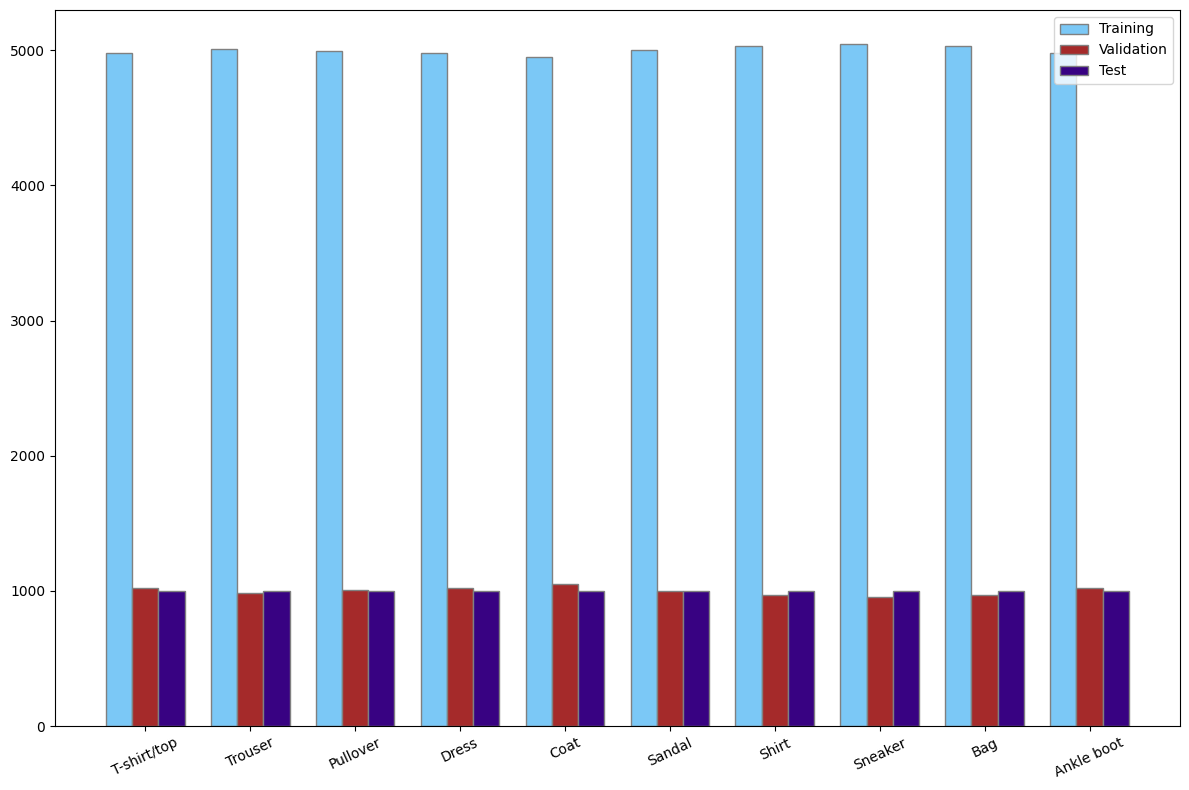

In [13]:
plt.figure(figsize=(12,8))
x = range(len(classes["Class"]))
plt.bar(x,classes["Training"],color ='#7BC8F6', width = 0.25, 
        edgecolor ='grey',label="Training") 

plt.bar([i + 0.25 for i in x],classes["Validation"], color ='#A52A2A', width = 0.25, 
        edgecolor ='grey',label="Validation") 
plt.bar([i + 0.5 for i in x],classes["Test"],  color ='#380282', width = 0.25, 
       edgecolor ='grey',label="Test") 
plt.rc('xtick', labelsize=10)
plt.xticks([i + 0.25 for i in x], classes["Class"],rotation=25)
plt.legend(loc="upper right")

plt.tight_layout()

plt.show()


We plot the Training/Validation/Test distribution per class/label.

In [14]:
classes.sort_values(by="Class")

,Class,Training,Validation,Test
0,,,,
9,Ankle boot,4979,1021,1000
8,Bag,5032,968,1000
4,Coat,4950,1050,1000
3,Dress,4979,1021,1000
2,Pullover,4992,1008,1000
5,Sandal,5004,996,1000
6,Shirt,5030,970,1000
7,Sneaker,5045,955,1000
0,T-shirt/top,4977,1023,1000


3)

In [15]:
train_min, train_max = X_train.min(), X_train.max()
val_min, val_max = X_valid.min(), X_valid.max()
test_min, test_max = X_test.min(), X_test.max()

In [16]:
print(f" The range in Training is {X_train.min()}-{X_train.max()}")
print(f" The range in Validation is {X_valid.min()}-{X_valid.max()}")
print(f" The range in Test is {X_test.min()}-{X_test.max()}")

 The range in Training is 0-255
 The range in Validation is 0-255
 The range in Test is 0-255


In [8]:
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255. #normalization

4)

In [9]:
import matplotlib.pyplot as plt

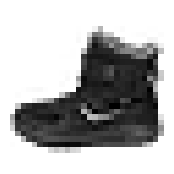

In [12]:
plt.figure(figsize=(2,2))
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [20]:
X_train.shape

(50000, 28, 28)

In [10]:
m=X_train.shape[1] // 2;m # the value to divide the picture in  two parts

14

In [11]:
X_train_upper = X_train[:, :m, :]
X_train_lower = X_train[:, m:, :]


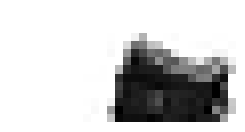

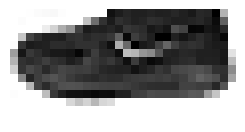

In [23]:
plt.subplot(121)
plt.imshow(X_train_upper[0], cmap="binary")
plt.axis('off')
plt.show()
plt.subplot(122)
plt.imshow(X_train_lower[0], cmap="binary")
plt.axis('off')
plt.show()

In [12]:
X_valid_upper = X_valid[:, :m, :]
X_valid_lower = X_valid[:, m:, :]

In [13]:
X_test_upper = X_test[:, :m, :]
X_test_lower = X_test[:, m:, :]

5)

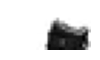

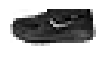

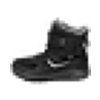

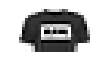

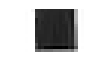

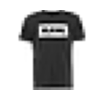

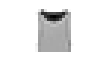

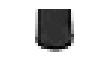

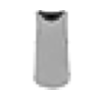

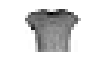

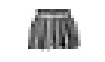

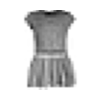

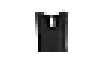

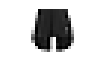

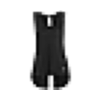

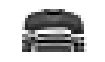

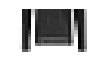

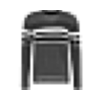

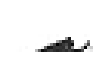

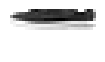

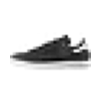

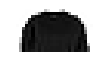

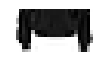

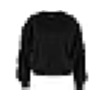

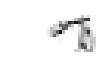

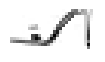

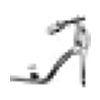

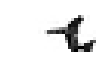

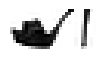

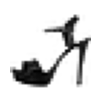

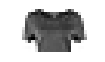

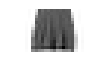

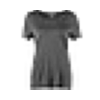

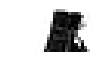

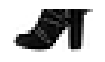

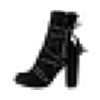

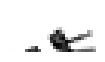

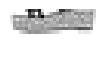

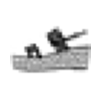

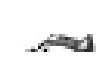

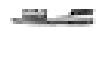

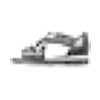

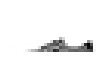

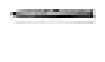

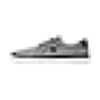

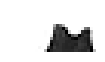

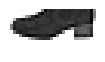

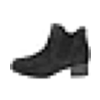

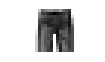

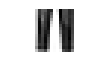

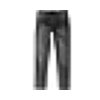

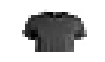

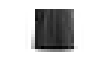

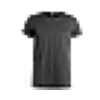

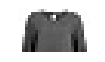

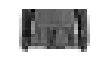

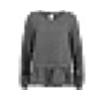

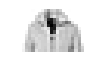

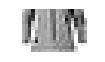

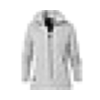

In [14]:
plt.figure(figsize=(5* 1.2, 4 * 1.2))
for i in range(20):
    plt.subplot(451)
    plt.imshow(X_train_upper[i], cmap="binary")
    plt.axis('off')
    plt.show()
    plt.subplot(452)
    plt.imshow(X_train_lower[i], cmap="binary")
    plt.axis('off')
    plt.show()
    plt.subplot(453)
    plt.imshow(X_train[i], cmap="binary")
    plt.axis('off')
    plt.show() 
   

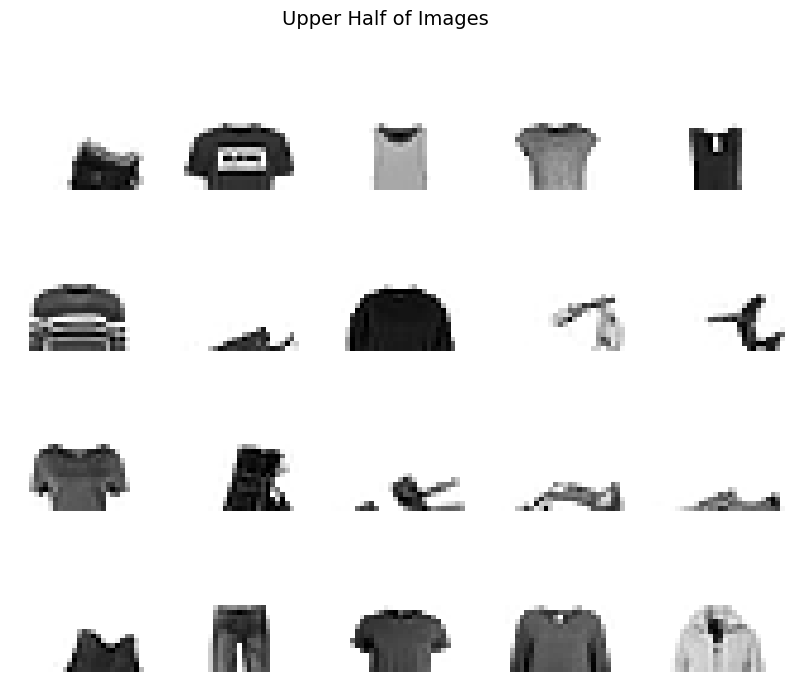

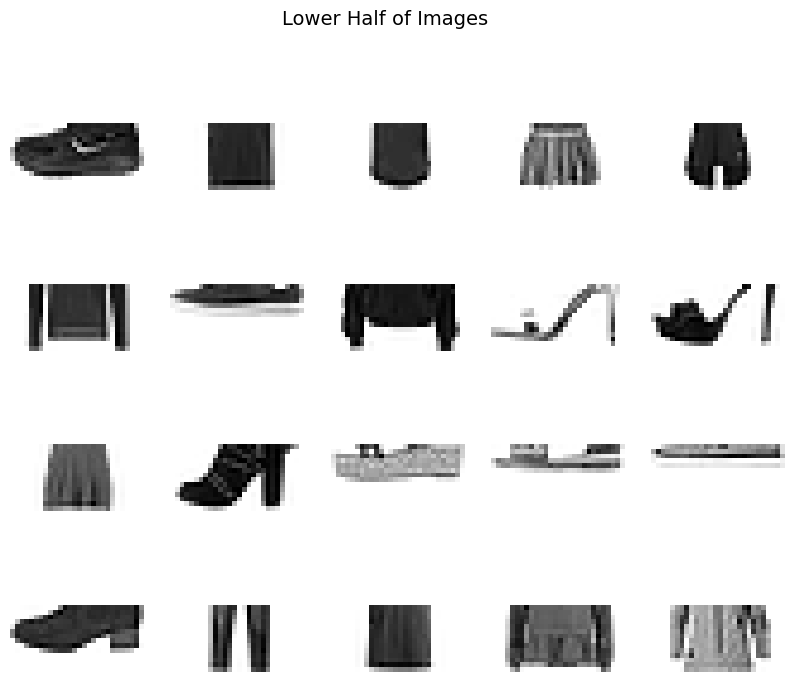

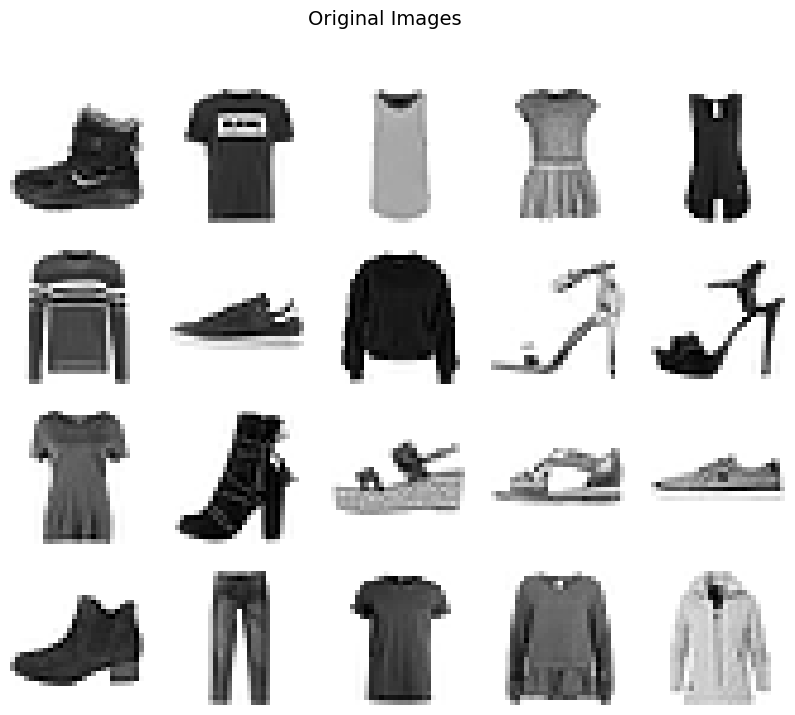

In [35]:
def plot_images(images, title):
    fig, axes = plt.subplots(4, 5, figsize=(10, 8))
    fig.suptitle(title, fontsize=14)
    
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i], cmap="binary")
        ax.axis("off")
    plt.show()

# Visualizing the first 20 instances
plot_images(X_train_upper[:20], "Upper Half of Images")
plot_images(X_train_lower[:20], "Lower Half of Images")
plot_images(X_train[:20], "Original Images")

6)

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD


In [27]:
pip install keras-tuner

   ---------------------------------------- 0.0/129.1 kB ? eta -:--:--
   --------- ------------------------------ 30.7/129.1 kB ? eta -:--:--
   ------------------ -------------------- 61.4/129.1 kB 825.8 kB/s eta 0:00:01
   ------------------------------------ - 122.9/129.1 kB 901.1 kB/s eta 0:00:01
   -------------------------------------- 129.1/129.1 kB 849.3 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [31]:
import keras_tuner as kt

In [32]:
def build_model(hp): #define function
    n_hidden = hp.Int("n_hidden", min_value=0, max_value=5, default=2)
    n_neurons = hp.Int("n_neurons", min_value=16, max_value=256)
    learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2,
                             sampling="log")
    optimizer = hp.Choice("optimizer", values=["sgd", "adam"])
    if optimizer == "sgd":
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    else:
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten())
    for _ in range(n_hidden):
        model.add(tf.keras.layers.Dense(n_neurons, activation="relu"))
    model.add(tf.keras.layers.Dense(10, activation="softmax"))
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
                  metrics=["accuracy"])
    return model

In [33]:
random_search_tuner = kt.RandomSearch( #select search algorithm
    build_model, objective="val_accuracy", max_trials=5, overwrite=True,
    directory="my_fashion_mnist", project_name="my_rnd_search", seed=42)
random_search_tuner.search(X_train, y_train, epochs=10,
                           validation_data=(X_valid, y_valid))

Trial 5 Complete [00h 01m 05s]
val_accuracy: 0.7664999961853027

Best val_accuracy So Far: 0.8644999861717224
Total elapsed time: 00h 05m 39s


In [34]:
top3_models = random_search_tuner.get_best_models(num_models=3)
best_model = top3_models[0];best_model

C:\Users\vagelis\anaconda3\envs\MLenv\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


<Sequential name=sequential, built=True>

In [35]:
for model in top3_models:
    print(model)                    #best model sequential

<Sequential name=sequential, built=True>
<Sequential name=sequential, built=True>
<Sequential name=sequential, built=True>


In [45]:
best_trial = random_search_tuner.oracle.get_best_trials(num_trials=5);best_trial

In [56]:
for trial in range(len(best_trial)):
    print(best_trial[trial].summary()) #we check 5 trial best trial is the first

Trial 3 summary
Hyperparameters:
n_hidden: 5
n_neurons: 37
learning_rate: 0.008547485565344062
optimizer: sgd
Score: 0.8644999861717224
None
Trial 2 summary
Hyperparameters:
n_hidden: 2
n_neurons: 74
learning_rate: 0.00905127409782462
optimizer: adam
Score: 0.8549000024795532
None
Trial 1 summary
Hyperparameters:
n_hidden: 5
n_neurons: 100
learning_rate: 0.0012482904754698163
optimizer: sgd
Score: 0.8264999985694885
None
Trial 0 summary
Hyperparameters:
n_hidden: 3
n_neurons: 25
learning_rate: 0.0006562536901904111
optimizer: sgd
Score: 0.7741000056266785
None
Trial 4 summary
Hyperparameters:
n_hidden: 3
n_neurons: 70
learning_rate: 0.00041268008323824807
optimizer: sgd
Score: 0.7664999961853027
None


In [64]:
best_trial[0].summary()

Trial 3 summary
Hyperparameters:
n_hidden: 5
n_neurons: 37
learning_rate: 0.008547485565344062
optimizer: sgd
Score: 0.8644999861717224


In [39]:

tf.random.set_seed(42)
model = Sequential([
    Flatten(input_shape=[28, 28]),  # Flatten the 28x28 images into a 1D vector with 784 features
    Dense(128, activation='relu'), 
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),   
    Dense(10, activation='softmax') # Output layer for multiclass classification (10 classes)
])

C:\Users\vagelis\anaconda3\envs\MLenv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [40]:
model.compile(
    optimizer=SGD(learning_rate=0.0085),  
    loss='sparse_categorical_crossentropy',  # Loss function for multiclass classification
    metrics=['accuracy']  
)

In [67]:
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 113,258 (442.41 KB)

 Trainable params: 113,258 (442.41 KB)

 Non-trainable params: 0 (0.00 B)

In [41]:
h=model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_valid, y_valid))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.4989 - loss: 1.5124 - val_accuracy: 0.7752 - val_loss: 0.6344
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7973 - loss: 0.5680 - val_accuracy: 0.8132 - val_loss: 0.5295
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8287 - loss: 0.4806 - val_accuracy: 0.8267 - val_loss: 0.4907
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8416 - loss: 0.4379 - val_accuracy: 0.8353 - val_loss: 0.4589
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8515 - loss: 0.4098 - val_accuracy: 0.8408 - val_loss: 0.4422
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8607 - loss: 0.3884 - val_accuracy: 0.8466 - val_loss: 0.4232
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8669 - loss: 0.3713 - val_accuracy: 0.8532 - val_loss: 0.4072
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8719 - loss: 0.3568 

In [94]:
import os.path
if os.path.isfile('models/medical_trial_model.h5') is False:
    model.save('models/medical_trial_model.h5')
    

In [1]:
from tensorflow.keras.models import load_model
new_model = load_model('models/medical_trial_model.h5')

In [98]:
model.get_weights()

[array([[-0.05688054, -0.07757661,  0.0785725 , ...,  0.01353372,
         -0.00376073, -0.03512138],
        [ 0.07461815, -0.04802269, -0.05150626, ..., -0.00398173,
         -0.07604922,  0.08140436],
        [-0.00593132,  0.06110356, -0.0196644 , ...,  0.05341588,
          0.05229332, -0.01372716],
        ...,
        [-0.06558347,  0.00550046,  0.06375263, ..., -0.00835241,
          0.02325862, -0.05864608],
        [ 0.02679791, -0.06797379,  0.05323991, ...,  0.07908835,
          0.04088614, -0.05393549],
        [-0.0724373 ,  0.03328717, -0.04304864, ...,  0.06019454,
          0.0767037 ,  0.02953889]], dtype=float32),
 array([ 0.24498217,  0.06350803,  0.21340787,  0.09387549,  0.23288228,
         0.00563084, -0.00166347,  0.03482864, -0.0557585 ,  0.17021973,
         0.177767  ,  0.16656432,  0.08729321,  0.16979697,  0.02518999,
        -0.02001357,  0.06830973,  0.01334275, -0.01539711,  0.01412653,
        -0.06727692, -0.00124809, -0.01148245,  0.09316356,  0.003

In [2]:
new_model.get_weights()

[array([[-0.05688054, -0.07757661,  0.0785725 , ...,  0.01353372,
         -0.00376073, -0.03512138],
        [ 0.07461815, -0.04802269, -0.05150626, ..., -0.00398173,
         -0.07604922,  0.08140436],
        [-0.00593132,  0.06110356, -0.0196644 , ...,  0.05341588,
          0.05229332, -0.01372716],
        ...,
        [-0.06558347,  0.00550046,  0.06375263, ..., -0.00835241,
          0.02325862, -0.05864608],
        [ 0.02679791, -0.06797379,  0.05323991, ...,  0.07908835,
          0.04088614, -0.05393549],
        [-0.0724373 ,  0.03328717, -0.04304864, ...,  0.06019454,
          0.0767037 ,  0.02953889]], dtype=float32),
 array([ 0.24498217,  0.06350803,  0.21340787,  0.09387549,  0.23288228,
         0.00563084, -0.00166347,  0.03482864, -0.0557585 ,  0.17021973,
         0.177767  ,  0.16656432,  0.08729321,  0.16979697,  0.02518999,
        -0.02001357,  0.06830973,  0.01334275, -0.01539711,  0.01412653,
        -0.06727692, -0.00124809, -0.01148245,  0.09316356,  0.003

<Figure size 1000x1000 with 0 Axes>

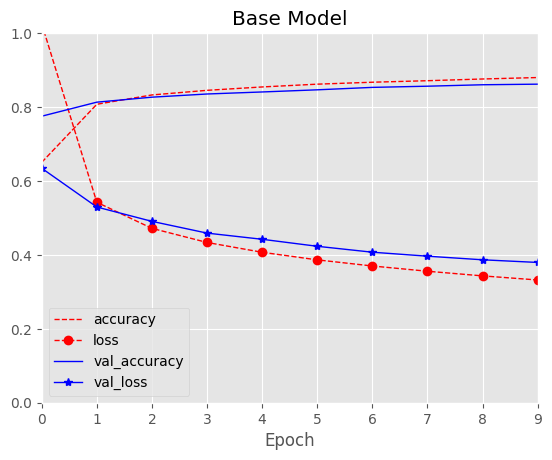

In [49]:
plt.style.use("ggplot")
plt.figure(figsize=(10,10))
pd.DataFrame(h.history).plot( xlim=[0, 9], ylim=[0, 1], grid=True, xlabel="Epoch", style=["r--", "r--o", "b-", "b-*"],linewidth=1)
plt.legend(loc="lower left") 
plt.title("Base Model")
plt.show()

7)

In [50]:
from sklearn.metrics import classification_report

In [51]:
tf.random.set_seed(42)
model2 = Sequential([
        Flatten(input_shape=(14, 28)),  # Adjusted input shape for cropped images
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')  
    ])


C:\Users\vagelis\anaconda3\envs\MLenv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [52]:
model2.compile(optimizer=SGD(learning_rate=0.0001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [53]:
weights = model2.get_weights() #store initial weights into a variable

In [65]:
# Train model on upper-half data 

model2.fit(X_train_upper, y_train, epochs=10, batch_size=32, validation_data=(X_valid_upper, y_valid))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.1849 - loss: 2.3250 - val_accuracy: 0.2497 - val_loss: 2.2333
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.2583 - loss: 2.2149 - val_accuracy: 0.2920 - val_loss: 2.1536
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.2984 - loss: 2.1396 - val_accuracy: 0.3423 - val_loss: 2.0826
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.3617 - loss: 2.0704 - val_accuracy: 0.4276 - val_loss: 2.0141
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.4489 - loss: 2.0028 - val_accuracy: 0.4987 - val_loss: 1.9452
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.5073 - loss: 1.9342 - val_accuracy: 0.5294 - val_loss: 1.8742
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5301 - loss: 1.8634 - val_accuracy: 0.5422 - val_loss: 1.8020
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.5400 - loss: 1.791

In [66]:
y_pred_upper = np.argmax(model2.predict(X_test_upper), axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step   


In [67]:
y_pred_upper

array([9, 2, 1, ..., 0, 1, 7], dtype=int64)

In [68]:
report_upper = classification_report(y_test, y_pred_upper,output_dict=True)

In [69]:
model2.set_weights(weights) #reset weights into the initial weight

In [70]:
# Train model on lower-half data  
model2.fit(X_train_lower, y_train, epochs=10, batch_size=32, validation_data=(X_valid_lower, y_valid))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.1335 - loss: 2.3069 - val_accuracy: 0.2678 - val_loss: 2.1818
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.2913 - loss: 2.1577 - val_accuracy: 0.3571 - val_loss: 2.0809
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3739 - loss: 2.0629 - val_accuracy: 0.4067 - val_loss: 1.9945
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4229 - loss: 1.9790 - val_accuracy: 0.4435 - val_loss: 1.9144
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4536 - loss: 1.9005 - val_accuracy: 0.4736 - val_loss: 1.8387
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4756 - loss: 1.8264 - val_accuracy: 0.4945 - val_loss: 1.7668
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4936 - loss: 1.7559 - val_accuracy: 0.5098 - val_loss: 1.6983
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5104 - loss: 1.6889 - 

In [71]:
y_pred_lower = np.argmax(model2.predict(X_test_lower), axis=1) #the id-label of maximum

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step 


In [72]:
report_lower = classification_report(y_test, y_pred_lower,output_dict=True)

In [73]:
df_lower = pd.DataFrame(report_lower).transpose()

In [74]:
df_upper = pd.DataFrame(report_upper).transpose()

In [75]:
df_lower,df_upper

(              precision  recall  f1-score     support
 0              0.529172  0.7800  0.630558   1000.0000
 1              0.986053  0.7070  0.823529   1000.0000
 2              0.435484  0.4590  0.446933   1000.0000
 3              0.609277  0.6830  0.644036   1000.0000
 4              0.300126  0.4760  0.368136   1000.0000
 5              0.750000  0.0570  0.105948   1000.0000
 6              0.142857  0.0010  0.001986   1000.0000
 7              0.540084  0.8960  0.673938   1000.0000
 8              0.560947  0.4740  0.513821   1000.0000
 9              0.614648  0.8980  0.729785   1000.0000
 accuracy       0.543100  0.5431  0.543100      0.5431
 macro avg      0.546865  0.5431  0.493867  10000.0000
 weighted avg   0.546865  0.5431  0.493867  10000.0000,
               precision  recall  f1-score     support
 0              0.628983  0.6120  0.620375   1000.0000
 1              0.640204  0.8790  0.740834   1000.0000
 2              0.426421  0.5100  0.464481   1000.0000
 3       

In [76]:
df_report=df_lower.merge(df_upper,left_index=True,right_index=True)

In [77]:
df_report.columns=df_report.columns.str.replace("x","lower").str.replace("y","upper")

In [78]:
df_report #merged classification reports for lower and upper models for better comparison

,precision_lower,recall_lower,f1-score_lower,support_lower,precision_upper,recall_upper,f1-score_upper,support_upper
0,0.529172,0.7800,0.630558,1000.0000,0.628983,0.6120,0.620375,1000.0000
1,0.986053,0.7070,0.823529,1000.0000,0.640204,0.8790,0.740834,1000.0000
2,0.435484,0.4590,0.446933,1000.0000,0.426421,0.5100,0.464481,1000.0000
3,0.609277,0.6830,0.644036,1000.0000,0.569385,0.3980,0.468511,1000.0000
4,0.300126,0.4760,0.368136,1000.0000,0.373104,0.7380,0.495635,1000.0000
5,0.750000,0.0570,0.105948,1000.0000,0.857143,0.0300,0.057971,1000.0000
6,0.142857,0.0010,0.001986,1000.0000,0.200000,0.0150,0.027907,1000.0000
7,0.540084,0.8960,0.673938,1000.0000,0.568367,0.7690,0.653634,1000.0000
8,0.560947,0.4740,0.513821,1000.0000,0.895082,0.5460,0.678261,1000.0000
9,0.614648,0.8980,0.729785,1000.0000,0.570843,0.9750,0.720089,1000.0000


8)

In [80]:
#One model predicts correct class and the other the incorrect class 
correct_upper = (y_pred_upper == y_test) & (y_pred_lower != y_test) 
correct_lower = (y_pred_lower == y_test) & (y_pred_upper != y_test)

In [88]:
pd.DataFrame(correct_lower).value_counts()

False    8808
True     1192
Name: count, dtype: int64

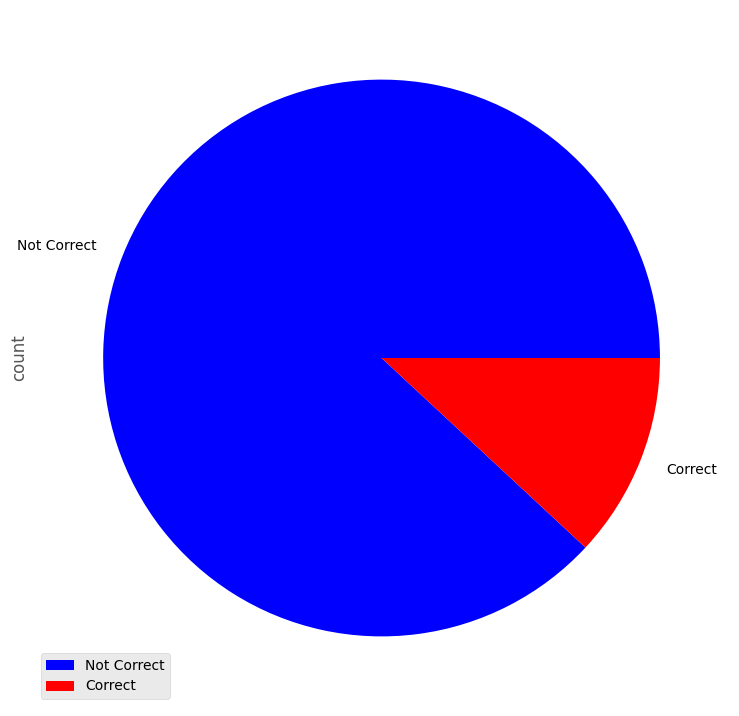

In [163]:
plt.style.use("ggplot")

plt.figure(figsize=(8,10))
pd.DataFrame(correct_lower).value_counts().plot(kind="pie",labels=["Not Correct","Correct"],colors=["b","r"],legend=True)
plt.legend(loc="lower left")

In [51]:
pd.DataFrame(correct_upper).value_counts()

False    8494
True     1506
Name: count, dtype: int64

In [121]:
indices5_upper=np.where(correct_upper==True)[0][:5];indices5_upper

array([16, 18, 23, 42, 46], dtype=int64)

In [122]:
indices5_upper.shape

(5,)

In [125]:
indices5_lower=np.where(correct_lower==True)[0][:5];indices5_lower

array([17, 27, 32, 33, 43], dtype=int64)

In [123]:
for ind in indices5_upper:
    print(f"Actual {y_test[ind]}, Correct Prediction {y_pred_upper[ind]}, False Prediction {y_pred_lower[ind]}")

Actual 2, Correct Prediction 2, False Prediction 8
Actual 8, Correct Prediction 8, False Prediction 9
Actual 9, Correct Prediction 9, False Prediction 7
Actual 3, Correct Prediction 3, False Prediction 0
Actual 2, Correct Prediction 2, False Prediction 4


In [126]:
for ind in indices5_lower:
    print(f"Actual {y_test[ind]}, Correct Prediction {y_pred_lower[ind]}, False Prediction {y_pred_upper[ind]}")

Actual 4, Correct Prediction 4, False Prediction 0
Actual 0, Correct Prediction 0, False Prediction 3
Actual 3, Correct Prediction 3, False Prediction 1
Actual 3, Correct Prediction 3, False Prediction 4
Actual 7, Correct Prediction 7, False Prediction 9


Problem 2

1)

In [128]:
from tensorflow.keras.optimizers import Adam

In [129]:
model3 = Sequential([
        Flatten(input_shape=(14, 28)),  # Adjusted input shape for cropped images
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(32,activation='relu'),
        Dense(10, activation='softmax')  
    ])

C:\Users\vagelis\anaconda3\envs\MLenv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [130]:
model3.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [131]:
history=model3.fit(X_train_upper, y_train, epochs=15, batch_size=32, validation_data=(X_valid_upper, y_valid))

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.5415 - loss: 1.3486 - val_accuracy: 0.7699 - val_loss: 0.6743
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7746 - loss: 0.6401 - val_accuracy: 0.7914 - val_loss: 0.5903
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7951 - loss: 0.5683 - val_accuracy: 0.8009 - val_loss: 0.5546
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8061 - loss: 0.5351 - val_accuracy: 0.8034 - val_loss: 0.5355
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8136 - loss: 0.5142 - val_accuracy: 0.8101 - val_loss: 0.5222
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8189 - loss: 0.4986 - val_accuracy: 0.8117 - val_loss: 0.5127
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8219 - loss: 0.4859 - val_accuracy: 0.8138 - val_loss: 0.5043
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8261 - loss: 0.475

In [132]:
Evaluation = model3.evaluate(X_test_upper, y_test, verbose=2)

313/313 - 1s - 2ms/step - accuracy: 0.8191 - loss: 0.4902


In [133]:
model3_predictions=np.argmax(model3.predict(X_test_upper), axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step   


In [134]:
cl_report_model3 = classification_report(y_test, model3_predictions,output_dict=True)

In [135]:
pd.DataFrame(cl_report_model3)

,0,1,2,3,4,5,6,7,8,9,accuracy,macro avg,weighted avg
precision,0.799578,0.949546,0.695171,0.826471,0.719139,0.953751,0.533333,0.866728,0.946054,0.938754,0.8191,0.822853,0.822853
recall,0.758000,0.941000,0.691000,0.843000,0.635000,0.928000,0.616000,0.943000,0.947000,0.889000,0.8191,0.819100,0.819100
f1-score,0.778234,0.945254,0.693079,0.834653,0.674456,0.940699,0.571694,0.903257,0.946527,0.913200,0.8191,0.820105,0.820105
support,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,0.8191,10000.000000,10000.000000


In [136]:
history.params,history.epoch

({'verbose': 'auto', 'epochs': 15, 'steps': 1563},
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])

In [164]:
plt.style.use("ggplot")


In [210]:
# Get best epoch (lowest validation loss)
best_epoch_base = np.argmin(history.history['val_loss'])

In [255]:
best_epoch_base

14

<Figure size 800x1000 with 0 Axes>

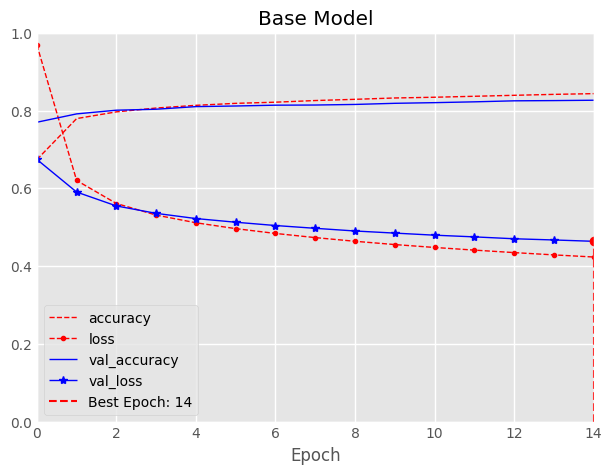

In [239]:
plt.figure(figsize=(8,10))
pd.DataFrame(history.history).plot( xlim=[0, 14], ylim=[0, 1], grid=True, xlabel="Epoch", style=["r--", "r--.", "b-", "b-*"],linewidth=1)
plt.plot(best_epoch_base,min(history.history["val_loss"]),"ro")
plt.vlines(best_epoch_base,0,min(history.history['val_loss']), linestyle="--", color="red", label=f"Best Epoch: {best_epoch_base}",linewidth=1.5)
plt.legend(loc="lower left") 
plt.title("Base Model")
plt.show()

2)

In [139]:
from tensorflow.keras.callbacks import EarlyStopping

In [140]:
callback=EarlyStopping(patience=2,monitor="val_loss")

In [240]:
history1=model3.fit(X_train_upper, y_train, epochs=15, batch_size=32, validation_data=(X_valid_upper, y_valid),callbacks=[callback])

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8663 - loss: 0.3618 - val_accuracy: 0.8388 - val_loss: 0.4366
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8681 - loss: 0.3588 - val_accuracy: 0.8408 - val_loss: 0.4353
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8690 - loss: 0.3558 - val_accuracy: 0.8408 - val_loss: 0.4344
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8705 - loss: 0.3529 - val_accuracy: 0.8424 - val_loss: 0.4332
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8710 - loss: 0.3500 - val_accuracy: 0.8431 - val_loss: 0.4332
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8720 - loss: 0.3473 - val_accuracy: 0.8432 - val_loss: 0.4323
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8738 - loss: 0.3446 - val_accuracy: 0.8439 - val_loss: 0.4317
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8745 - loss: 0.3418 - 

In [241]:
model3_callback_predictions=np.argmax(model3.predict(X_test_upper), axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step  


In [242]:
cl_report_model3_callback = classification_report(y_test, model3_callback_predictions,output_dict=True)

In [243]:
pd.DataFrame(cl_report_model3_callback)

,0,1,2,3,4,5,6,7,8,9,accuracy,macro avg,weighted avg
precision,0.815733,0.945491,0.738683,0.841131,0.733402,0.961698,0.577452,0.866667,0.947577,0.944563,0.8351,0.837240,0.837240
recall,0.757000,0.954000,0.718000,0.863000,0.707000,0.929000,0.630000,0.949000,0.958000,0.886000,0.8351,0.835100,0.835100
f1-score,0.785270,0.949726,0.728195,0.851925,0.719959,0.945066,0.602582,0.905967,0.952760,0.914345,0.8351,0.835579,0.835579
support,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,0.8351,10000.000000,10000.000000


In [244]:
# Get best epoch (lowest validation loss)
best_epoch_erstop = np.argmin(history1.history['val_loss'])

In [245]:
best_epoch_erstop

7

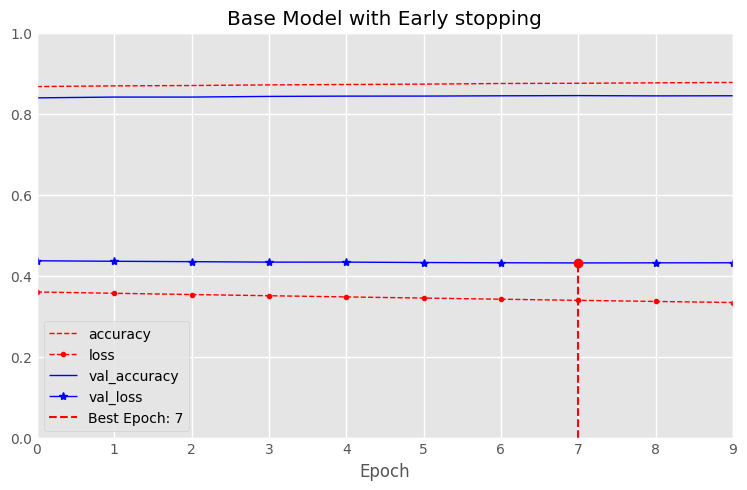

In [247]:
pd.DataFrame(history1.history).plot(
    figsize=(8, 5), xlim=[0, 9], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"],linewidth=1)
plt.plot(best_epoch_erstop,min(history1.history['val_loss']),"ro")
plt.vlines(best_epoch_erstop,0,min(history1.history['val_loss']), linestyle="--", color="red", label=f"Best Epoch: {best_epoch_erstop}",linewidth=1.5)
plt.legend(loc="lower left")
plt.title("Base Model with Early stopping")
plt.show()

3)

In [146]:
from tensorflow.keras.layers import BatchNormalization

In [147]:
model4 = Sequential([
        Flatten(input_shape=(14, 28)),  
        Dense(128, activation='relu',use_bias=False),
        BatchNormalization(),
        Dense(64, activation='relu',use_bias=False),
        BatchNormalization(),
        Dense(32,activation='relu',use_bias=False),
        BatchNormalization(),
        Dense(10, activation='softmax',use_bias=False)  
    ])

C:\Users\vagelis\anaconda3\envs\MLenv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [148]:
model4.compile(optimizer=Adam(learning_rate=0.0001),  
                  loss='sparse_categorical_crossentropy',  
                  metrics=['accuracy'])

In [149]:
history2=model4.fit(X_train_upper, y_train, epochs=15, batch_size=32, validation_data=(X_valid_upper, y_valid))

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.5622 - loss: 1.3601 - val_accuracy: 0.7817 - val_loss: 0.6499
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7772 - loss: 0.6630 - val_accuracy: 0.8041 - val_loss: 0.5574
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7967 - loss: 0.5741 - val_accuracy: 0.8104 - val_loss: 0.5225
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8112 - loss: 0.5259 - val_accuracy: 0.8184 - val_loss: 0.4996
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8214 - loss: 0.4935 - val_accuracy: 0.8226 - val_loss: 0.4846
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8307 - loss: 0.4673 - val_accuracy: 0.8242 - val_loss: 0.4754
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8386 - loss: 0.4469 - val_accuracy: 0.8253 - val_loss: 0.4696
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8448 - loss: 0.4280 

In [150]:
model4_predictions=np.argmax(model4.predict(X_test_upper), axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step   


In [151]:
cl_report_model4 = classification_report(y_test, model4_predictions,output_dict=True)

In [152]:
pd.DataFrame(cl_report_model4)

,0,1,2,3,4,5,6,7,8,9,accuracy,macro avg,weighted avg
precision,0.774949,0.944167,0.677298,0.852577,0.700488,0.936937,0.585954,0.873001,0.956434,0.936909,0.8233,0.823871,0.823871
recall,0.761000,0.947000,0.722000,0.827000,0.718000,0.936000,0.559000,0.928000,0.944000,0.891000,0.8233,0.823300,0.823300
f1-score,0.767911,0.945582,0.698935,0.839594,0.709136,0.936468,0.572160,0.899661,0.950176,0.913378,0.8233,0.823300,0.823300
support,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,0.8233,10000.000000,10000.000000


In [230]:
best_epoch_batchnorm = np.argmin(history2.history['val_loss'])

In [254]:
best_epoch_batchnorm

9

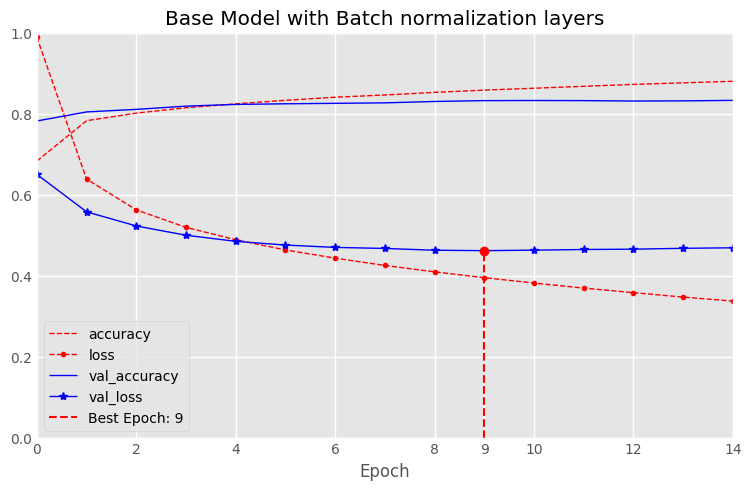

In [235]:
pd.DataFrame(history2.history).plot(
    figsize=(8, 5), xlim=[0, 14], ylim=[0, 1], grid=True, xlabel="Epoch",linewidth=1,
    style=["r--", "r--.", "b-", "b-*"])
plt.vlines(best_epoch_batchnorm,0,min(history2.history['val_loss']), linestyle="--", color="red", label=f"Best Epoch: {best_epoch_batchnorm}",linewidth=1.5)
plt.plot(best_epoch_batchnorm,min(history2.history['val_loss']),"ro")
plt.legend(loc="lower left")
plt.xticks([0,2,4,6,8,9,10,12,14])
plt.title("Base Model with Batch normalization layers")
plt.show()

4)

In [154]:
from tensorflow.keras.layers import Dropout

In [155]:
model5 = Sequential([
        Flatten(input_shape=(14, 28)),  
        Dense(128, activation='relu'),
        Dropout(rate=0.5),
        Dense(64, activation='relu'),
        Dropout(rate=0.5),
        Dense(32,activation='relu'),
        Dropout(rate=0.5),
        Dense(10, activation='softmax')  
    ])

C:\Users\vagelis\anaconda3\envs\MLenv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [156]:
model5.compile(optimizer=Adam(learning_rate=0.0001),  
                  loss='sparse_categorical_crossentropy',  
                  metrics=['accuracy'])

In [157]:
history3=model5.fit(X_train_upper, y_train, epochs=15, batch_size=32, validation_data=(X_valid_upper, y_valid))

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.1923 - loss: 2.1655 - val_accuracy: 0.5578 - val_loss: 1.2888
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.4149 - loss: 1.5343 - val_accuracy: 0.6656 - val_loss: 0.9898
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5146 - loss: 1.2737 - val_accuracy: 0.7137 - val_loss: 0.8520
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.5703 - loss: 1.1313 - val_accuracy: 0.7339 - val_loss: 0.7778
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.6056 - loss: 1.0472 - val_accuracy: 0.7472 - val_loss: 0.7324
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.6369 - loss: 0.9777 - val_accuracy: 0.7569 - val_loss: 0.6984
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.6549 - loss: 0.9296 - val_accuracy: 0.7660 - val_loss: 0.6710
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.6741 - loss: 0.893

In [158]:
model5_predictions=np.argmax(model5.predict(X_test_upper), axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step   


In [159]:
cl_report_model5 = classification_report(y_test, model5_predictions,output_dict=True)

In [160]:
pd.DataFrame(cl_report_model5)

,0,1,2,3,4,5,6,7,8,9,accuracy,macro avg,weighted avg
precision,0.722122,0.971983,0.622659,0.775763,0.546580,0.928352,0.443333,0.881119,0.939122,0.898931,0.781,0.772996,0.772996
recall,0.803000,0.902000,0.665000,0.813000,0.839000,0.907000,0.133000,0.882000,0.941000,0.925000,0.781,0.781000,0.781000
f1-score,0.760417,0.935685,0.643133,0.793945,0.661933,0.917552,0.204615,0.881559,0.940060,0.911779,0.781,0.765068,0.765068
support,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,0.781,10000.000000,10000.000000


In [236]:
best_epoch_Dropout= np.argmin(history3.history['val_loss'])

In [237]:
best_epoch_Dropout

14

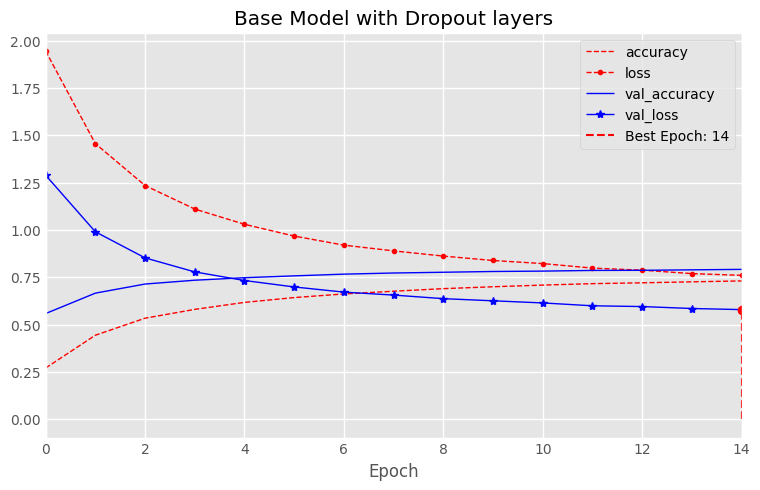

In [253]:
pd.DataFrame(history3.history).plot(figsize=(8, 5), xlim=[0, 14], grid=True, xlabel="Epoch", style=["r--", "r--.", "b-", "b-*"],
                                   linewidth=1)
plt.vlines(best_epoch_Dropout,0,min(history3.history["val_loss"]),linewidth=1.5,linestyle="--",color="red",label=f"Best Epoch: {best_epoch_Dropout}")
plt.plot(best_epoch_Dropout,min(history3.history["val_loss"]),"ro")
plt.legend(loc="upper right")
plt.title("Base Model with Dropout layers")
plt.show()

<Figure size 1500x1500 with 0 Axes>

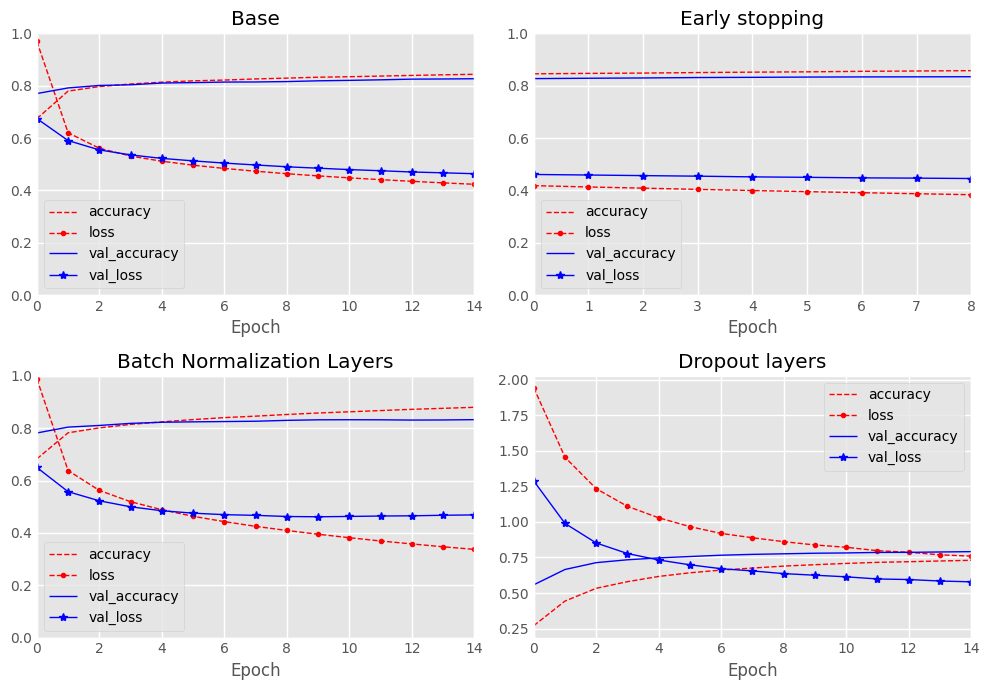

In [205]:
plt.figure(figsize=(15,15))
fig, axs = plt.subplots(2, 2)
pd.DataFrame(history.history).plot(figsize=(10, 7),ax=axs[0, 0], xlim=[0, 14], ylim=[0, 1], grid=True, xlabel="Epoch", style=["r--", "r--.", "b-", "b-*"],
                                   title="Base",linewidth=1)
plt.legend(loc="lower left") 
plt.title("Base Model")
 
pd.DataFrame(history1.history).plot(
    figsize=(10, 7),ax=axs[0, 1], xlim=[0, 8], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"],linewidth=1,title="Early stopping")
plt.legend(loc="lower left")
plt.title("Base Model with Early stopping")

pd.DataFrame(history2.history).plot(
    figsize=(10, 7),ax=axs[1,0], xlim=[0, 14], ylim=[0, 1], grid=True, xlabel="Epoch",linewidth=1,
    style=["r--", "r--.", "b-", "b-*"],title="Batch Normalization Layers")
plt.legend(loc="lower left") 
plt.title("Base Model with Batch normalization layers")
  
pd.DataFrame(history3.history).plot(figsize=(10, 7),ax=axs[1,1],title="Dropout layers", xlim=[0, 14], grid=True, xlabel="Epoch", style=["r--", "r--.", "b-", "b-*"],linewidth=1)
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()